In [174]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LinearRegression

## Multiple linear regression
Cost formula: $$ J(\vec{w},b)=\frac1{2m} \sum_{i=1}^{m}[f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)}]^2$$
Model formula: $$ f_{\vec{w},b}(\vec{x})=\vec{w} \cdot \vec{x}+b $$


In [162]:
def cost_function(X, y, w, b):
    """
    Computes the cost function for multiple linear regression
    
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_xi = np.dot(X[i],w)+b
        cost = cost + (f_xi - y[i])**2
    cost = cost/(2*m)
    return cost

Gradient descent algorihm: $$ w=w-\alpha\frac{\partial}{\partial{w}}J(\vec{w},b)=\frac1m \sum_{i=1}^{m}[f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)}]x_j^{(i)}$$
$$ b=b-\alpha\frac{\partial}{\partial{b}}J(w,b)=\frac1m \sum_{i=1}^{m}[f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)}]$$

In [163]:
def compute_gradient_descent(X, y, w, b):
    """
    Computes the gradient for multiple linear regression
    
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_xi_y = (np.dot(X[i],w)+b) - y[i]   
        for j in range(n):
            dj_dw[j] += (f_xi_y * X[i,j])
        dj_db += f_xi_y
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db    

In [164]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha.
    
    """
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_descent(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
    return w,b

In [339]:
#random data
X_train = np.array([[1.0, 10,1.5], [2.0, 20,2], [8.0,70,2.75]])
y_train = np.array([10, 15, 30])

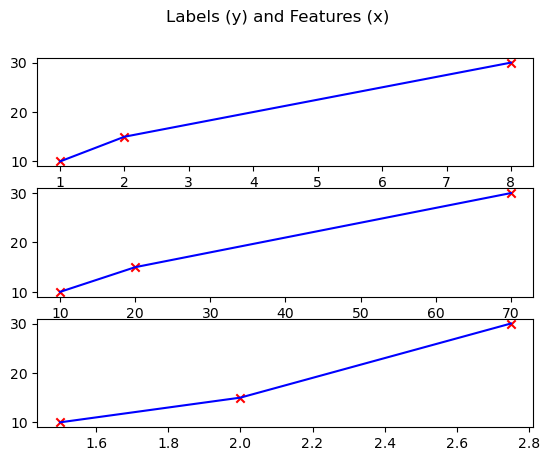

In [340]:
fig, axs = plt.subplots(3)
fig.suptitle('Labels (y) and Features (x)')

for i in range(3):
    axs[i].scatter(X_train[:, i], y_train, marker='x',c='r')
    axs[i].plot(X_train[:, i], y_train,c='b')

plt.show()

In [265]:
#predictions
alpha = 0.001
w_in = np.zeros([X_train.shape[0]])
b_in = 0

w,b = gradient_descent(X_train, y_train, w_in, b_in, alpha, 1000)
print("num_iters: 1000")
print("w: ",w)
print("b: ", b)
print("cost: ", cost_function(X_train,y_train,w,b))
w,b = gradient_descent(X_train, y_train, w_in, b_in, alpha, 100000)

print("\nnum_iters: 100000")
print("w: ",w)
print("b: ", b)
print("cost: ", cost_function(X_train,y_train,w,b))

predict = np.dot(X_train,w)+b

print("\nlabels: ", y_train)
print("My algorithm predictions: ", predict)

lr = LinearRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_train)

print("LinearRegression: ",predict_lr)
x = np.array([[5,30,1.75]])

print("\nMy predictions for: ", x)
print(np.dot(x,w)+b)
print("LinearRegression: ",lr.predict(x))

num_iters: 1000
w:  [-0.42536862  0.36590371  2.49324508]
b:  1.666521668802541
cost:  0.9866994105650773

num_iters: 100000
w:  [-1.505021    0.42263212  4.05391489]
b:  1.325035919546418
cost:  0.005332137747120872

labels:  [10 15 30]
My algorithm predictions:  [10.12720846 14.8754661  30.01738226]
LinearRegression:  [10. 15. 30.]

My predictions for:  [[ 5.   30.    1.75]]
[13.57324558]
LinearRegression:  [11.92599909]


##### Perfect predictions for data that we used to train our algorithm. Too little data to predict well based on features that didn't include in X_train.

## Logistic Regression
Model formula: $$f_{\vec{w},b}(\vec{x})=g(\vec{w}\cdot\vec{x}+b)=\frac1{1+e^{(\vec{w}\cdot\vec{x}+b)}}$$
Cost formula: $$ J(\vec{w},b)=-\frac1m \sum_{i=1}^{m}[y^{(i)}\log(f_{\vec{w},b}(\vec{x}^{(i)}))+(1-y^{(i)})\log(1-f_{\vec{w},b}(\vec{x}^{(i)}))] $$

In [209]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [211]:
def cost_function_logistic(X,y,w,b):
    """
    Computes the cost function for logistic regression
    
    """
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_xi = sigmoid(z_i)
        cost += (-y[i]*np.log(f_xi))-((1-y[i])*np.log(1-f_xi))
    cost = cost/m
    return cost

Gradient descent: $$ w=w-\alpha[\frac1m \sum_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)})x_j^{(i)}]$$
$$ b=b-\alpha[\frac1m \sum_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)})]$$
Model formula: $$f_{\vec{w},b}(\vec{x})=\frac1{1+e^{(\vec{w}\cdot\vec{x}+b)}}$$

In [303]:
def compute_gradient_logistic(X,y,w,b):
    """
    Computes the gradient for logistic regression
    
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_xi_y = sigmoid(np.dot(X[i],w)+b) - y[i]
        for j in range(n):
            dj_dw[j] += f_xi_y * X[i,j]
        dj_db += f_xi_y
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [304]:
def gradient_descent_logistic(X,y,w_in,b_in,alpha,num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w,b

In [377]:
#random data
X_train_l = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train_l = np.array([0, 0, 0, 1, 1, 1])

[[0.5 1.  1.5 3.  2.  1. ]
 [1.5 1.  0.5 0.5 2.  2.5]]


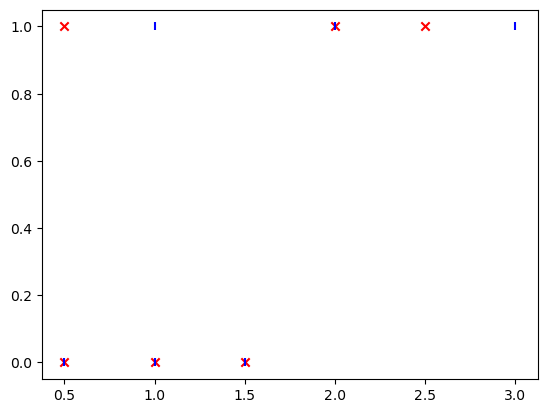

In [392]:
x = X_train_l.transpose()
print(x)

plt.scatter(x[1],y_train_l,marker="x",c="r")
plt.scatter(x[0],y_train_l,marker="|",c="b")

plt.show()

In [390]:
w_in = np.array([0.,0.])
b_in = 0
alpha = 0.1

w,b = gradient_descent_logistic(X_train_l,y_train_l,w_in,b_in,alpha,10000)

print("num_iters: 10000")
print("w: ",w)
print("b: ", b)
print("cost: ", cost_function_logistic(X_train_l,y_train_l,w,b))

w,b = gradient_descent_logistic(X_train_l,y_train_l,w_in,b_in,alpha,100000)

print("num_iters: 100000")
print("w: ",w)
print("b: ", b)
print("cost: ", cost_function_logistic(X_train_l,y_train_l,w,b))


predict = sigmoid(np.dot(X_train_l,w)+b)

print("\nlabels: ", y_train_l)
print("My algorithm predictions: ", predict)

N = [4,1]
print("\nPredictions for: ", N)
print(sigmoid(np.dot(N,w)+b))


num_iters: 10000
w:  [5.28123029 5.07815608]
b:  -14.222409982019837
cost:  0.017117768890292925
num_iters: 100000
w:  [8.35313087 8.15226727]
b:  -22.690605796630248
cost:  0.0016974661879524142

labels:  [0 0 0 1 1 1]
My algorithm predictions:  [0.0018594  0.00205544 0.0022721  0.99841395 0.99996704 0.99763166]

Predictions for:  [4, 1]
0.9999999936460231


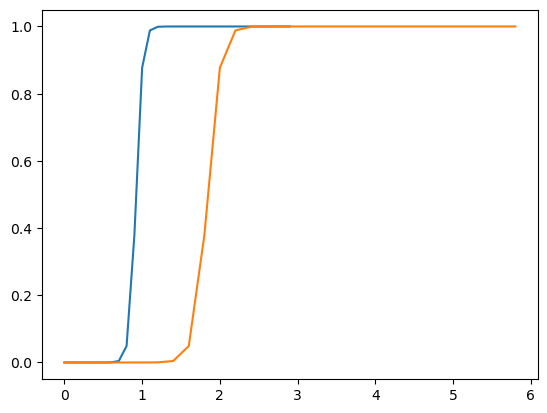

In [401]:
x1 = np.array([[i*0.1,i*0.2] for i in range(30)])

plt.plot(x1, sigmoid(np.dot(x1,w)+b))
plt.show()